In [1]:
# Common imports
import numpy as np
import pandas as pd
import os
import os.path
import urllib

# To plot pretty figures
import matplotlib.pyplot as plt

In [2]:
#https://fred.stlouisfed.org/series/balance
df = pd.read_csv(r'C:\Users\zelli\Downloads\M318501Q027NBEA.csv')
df['balance']=df['M318501Q027NBEA']
df=df.drop('M318501Q027NBEA',axis=1)
df.head(10)

,DATE,balance
0,1959-07-01,-3.011
1,1959-10-01,-4.498
2,1960-01-01,3.819
3,1960-04-01,4.439
4,1960-07-01,-0.804
5,1960-10-01,-3.898
6,1961-01-01,1.356
7,1961-04-01,1.046
8,1961-07-01,-3.334
9,1961-10-01,-5.884


In [3]:
df2 = pd.read_excel(r'C:\Users\zelli\Downloads\Book 1.xlsx')


df2

,"Presidency ,President ,Wikipedia Entry,Took office ,Left office ,Party ,Portrait,Thumbnail,Home State"
0,"1,George Washington,http://en.wikipedia.org/wi..."
1,"2,John Adams,http://en.wikipedia.org/wiki/John..."
2,"3,Thomas Jefferson,http://en.wikipedia.org/wik..."
3,"4,James Madison,http://en.wikipedia.org/wiki/J..."
4,"5,James Monroe,http://en.wikipedia.org/wiki/Ja..."
5,"6,John Quincy Adams,http://en.wikipedia.org/wi..."
6,"7,Andrew Jackson,http://en.wikipedia.org/wiki/..."
7,"8,Martin Van Buren,http://en.wikipedia.org/wik..."
8,"9,William Henry Harrison,http://en.wikipedia.o..."
9,"10,John Tyler,http://en.wikipedia.org/wiki/Joh..."


In [4]:
df2= df2['Presidency ,President ,Wikipedia Entry,Took office ,Left office ,Party ,Portrait,Thumbnail,Home State'].str.split(',', expand=True)

In [5]:
merged_df = pd.merge(df2[1], df2[3], left_index=True, right_index=True)
merged_df = pd.merge(merged_df, df2[4], left_index=True, right_index=True)
df2 = pd.merge(merged_df, df2[5], left_index=True, right_index=True)
df2

,1,3,4,5
0,George Washington,30/04/1789,4/03/1797,Independent
1,John Adams,4/03/1797,4/03/1801,Federalist
2,Thomas Jefferson,4/03/1801,4/03/1809,Democratic-Republican
3,James Madison,4/03/1809,4/03/1817,Democratic-Republican
4,James Monroe,4/03/1817,4/03/1825,Democratic-Republican
5,John Quincy Adams,4/03/1825,4/03/1829,Democratic-Republican/National Republican
6,Andrew Jackson,4/03/1829,4/03/1837,Democratic
7,Martin Van Buren,4/03/1837,4/03/1841,Democratic
8,William Henry Harrison,4/03/1841,4/04/1841,Whig
9,John Tyler,4/04/1841,4/03/1845,Whig


In [6]:
df2['took_office'] = df2[3].str[-4:]+'-'+ df2[3].str[-7:-5]
df2['left_office'] = df2[4].str[-4:]+'-'+df2[4].str[-7:-5]
df2['party'] = df2[5]
df2['took_office']=df2['took_office'].str.replace('/', '0')
df2['left_office']=df2['left_office'].str.replace('/', '0')
df2

,1,3,4,5,took_office,left_office,party
0,George Washington,30/04/1789,4/03/1797,Independent,1789-04,1797-03,Independent
1,John Adams,4/03/1797,4/03/1801,Federalist,1797-03,1801-03,Federalist
2,Thomas Jefferson,4/03/1801,4/03/1809,Democratic-Republican,1801-03,1809-03,Democratic-Republican
3,James Madison,4/03/1809,4/03/1817,Democratic-Republican,1809-03,1817-03,Democratic-Republican
4,James Monroe,4/03/1817,4/03/1825,Democratic-Republican,1817-03,1825-03,Democratic-Republican
5,John Quincy Adams,4/03/1825,4/03/1829,Democratic-Republican/National Republican,1825-03,1829-03,Democratic-Republican/National Republican
6,Andrew Jackson,4/03/1829,4/03/1837,Democratic,1829-03,1837-03,Democratic
7,Martin Van Buren,4/03/1837,4/03/1841,Democratic,1837-03,1841-03,Democratic
8,William Henry Harrison,4/03/1841,4/04/1841,Whig,1841-03,1841-04,Whig
9,John Tyler,4/04/1841,4/03/1845,Whig,1841-04,1845-03,Whig


In [7]:
entered=df2[[1,'took_office','party']]
left=df2[[1,'left_office','party']]

In [8]:
df['year'] = df['DATE'].str[:7]
df

,DATE,balance,year
0,1959-07-01,-3.011,1959-07
1,1959-10-01,-4.498,1959-10
2,1960-01-01,3.819,1960-01
3,1960-04-01,4.439,1960-04
4,1960-07-01,-0.804,1960-07
...,...,...,...
249,2021-10-01,-376.342,2021-10
250,2022-01-01,-290.920,2022-01
251,2022-04-01,151.471,2022-04
252,2022-07-01,-860.490,2022-07


In [9]:
df=df.merge(entered,left_on='year',right_on='took_office',how='left')
df=df.merge(left,left_on='year',right_on='left_office',how='left')

df

,DATE,balance,year,1_x,took_office,party_x,1_y,left_office,party_y
0,1959-07-01,-3.011,1959-07,NaN,NaN,NaN,NaN,NaN,NaN
1,1959-10-01,-4.498,1959-10,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-01-01,3.819,1960-01,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-04-01,4.439,1960-04,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-07-01,-0.804,1960-07,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
249,2021-10-01,-376.342,2021-10,NaN,NaN,NaN,NaN,NaN,NaN
250,2022-01-01,-290.920,2022-01,NaN,NaN,NaN,NaN,NaN,NaN
251,2022-04-01,151.471,2022-04,NaN,NaN,NaN,NaN,NaN,NaN
252,2022-07-01,-860.490,2022-07,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df['1_x']=df['1_x'].fillna(method='ffill')
df['1_y']=df['1_y'].fillna(method='ffill')
df['took_office']=df['took_office'].fillna(method='ffill')
df['left_office']=df['left_office'].fillna(method='ffill')
df['party_curr']=df['party_x'].fillna(method='ffill')
df['party_ex']=df['party_y'].fillna(method='ffill')
df

,DATE,balance,year,1_x,took_office,party_x,1_y,left_office,party_y,party_curr,party_ex
0,1959-07-01,-3.011,1959-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1959-10-01,-4.498,1959-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-01-01,3.819,1960-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-04-01,4.439,1960-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-07-01,-0.804,1960-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
249,2021-10-01,-376.342,2021-10,Barack Obama,2009-01,NaN,George W. Bush,2009-01,NaN,Democratic,Republican
250,2022-01-01,-290.920,2022-01,Barack Obama,2009-01,NaN,George W. Bush,2009-01,NaN,Democratic,Republican
251,2022-04-01,151.471,2022-04,Barack Obama,2009-01,NaN,George W. Bush,2009-01,NaN,Democratic,Republican
252,2022-07-01,-860.490,2022-07,Barack Obama,2009-01,NaN,George W. Bush,2009-01,NaN,Democratic,Republican


In [11]:
df=df[['DATE','balance','1_x','took_office','1_y','left_office','party_curr','party_ex']]
df

,DATE,balance,1_x,took_office,1_y,left_office,party_curr,party_ex
0,1959-07-01,-3.011,NaN,NaN,NaN,NaN,NaN,NaN
1,1959-10-01,-4.498,NaN,NaN,NaN,NaN,NaN,NaN
2,1960-01-01,3.819,NaN,NaN,NaN,NaN,NaN,NaN
3,1960-04-01,4.439,NaN,NaN,NaN,NaN,NaN,NaN
4,1960-07-01,-0.804,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
249,2021-10-01,-376.342,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican
250,2022-01-01,-290.920,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican
251,2022-04-01,151.471,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican
252,2022-07-01,-860.490,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican


In [12]:
df = df.rename(columns={'1_x': 'incumbent','1_y':'ex-president'})
df=df.dropna()
df

,DATE,balance,incumbent,took_office,ex-president,left_office,party_curr,party_ex
6,1961-01-01,1.356,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican
7,1961-04-01,1.046,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican
8,1961-07-01,-3.334,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican
9,1961-10-01,-5.884,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican
10,1962-01-01,0.291,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican
...,...,...,...,...,...,...,...,...
249,2021-10-01,-376.342,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican
250,2022-01-01,-290.920,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican
251,2022-04-01,151.471,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican
252,2022-07-01,-860.490,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican


In [13]:
df = df[df['DATE'].str[:4].astype(int) < 2017]

df['4Yr_trailing_avg'] = df['balance'].rolling(window=16, min_periods=1).mean()
df['years_in']=df['DATE'].str[:4].astype(int)-df['took_office'].str[:4].astype(int)
df['years_out']=df['left_office'].str[:4].astype(int)-df['DATE'].str[:4].astype(int)

df

C:\Users\zelli\AppData\Local\Temp\ipykernel_6916\2744994075.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['4Yr_trailing_avg'] = df['balance'].rolling(window=16, min_periods=1).mean()
C:\Users\zelli\AppData\Local\Temp\ipykernel_6916\2744994075.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['years_in']=df['DATE'].str[:4].astype(int)-df['took_office'].str[:4].astype(int)
C:\Users\zelli\AppData\Local\Temp\ipykernel_6916\2744994075.py:5: SettingWithCopyWarning: 
A value is trying to be set on a 

,DATE,balance,incumbent,took_office,ex-president,left_office,party_curr,party_ex,4Yr_trailing_avg,years_in,years_out
6,1961-01-01,1.356,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,1.356000,0,0
7,1961-04-01,1.046,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,1.201000,0,0
8,1961-07-01,-3.334,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,-0.310667,0,0
9,1961-10-01,-5.884,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,-1.704000,0,0
10,1962-01-01,0.291,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,-1.305000,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
225,2015-10-01,-215.326,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican,-161.525688,6,-6
226,2016-01-01,-244.097,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican,-148.221188,7,-7
227,2016-04-01,59.146,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican,-136.726937,7,-7
228,2016-07-01,-186.352,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican,-136.802562,7,-7


In [14]:
df=df.reset_index()
df=df.drop('index',axis=1)
df

,DATE,balance,incumbent,took_office,ex-president,left_office,party_curr,party_ex,4Yr_trailing_avg,years_in,years_out
0,1961-01-01,1.356,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,1.356000,0,0
1,1961-04-01,1.046,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,1.201000,0,0
2,1961-07-01,-3.334,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,-0.310667,0,0
3,1961-10-01,-5.884,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,-1.704000,0,0
4,1962-01-01,0.291,John F. Kennedy,1961-01,Dwight D. Eisenhower,1961-01,Democratic,Republican,-1.305000,1,-1
...,...,...,...,...,...,...,...,...,...,...,...
219,2015-10-01,-215.326,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican,-161.525688,6,-6
220,2016-01-01,-244.097,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican,-148.221188,7,-7
221,2016-04-01,59.146,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican,-136.726937,7,-7
222,2016-07-01,-186.352,Barack Obama,2009-01,George W. Bush,2009-01,Democratic,Republican,-136.802562,7,-7


In [15]:
df.columns

Index(['DATE', 'balance', 'incumbent', 'took_office', 'ex-president',
       'left_office', 'party_curr', 'party_ex', '4Yr_trailing_avg', 'years_in',
       'years_out'],
      dtype='object')

In [16]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame df with columns 'party_curr' and 'party_ex'
# Example DataFrame:
# df = pd.read_excel(r'C:\Users\zelli\Downloads\Book 1.xlsx')

# Convert NumPy arrays to Pandas Series
current_president_party = pd.Series(df['party_curr'].values)
ex_president_party = pd.Series(df['party_ex'].values)

# Concatenate the Series into a DataFrame
parties = pd.concat([current_president_party, ex_president_party], axis=1, keys=['current_president', 'ex_president'])

# Initialize the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the data
encoded_data = encoder.fit_transform(parties).toarray()

# Create a new DataFrame with the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['current_president', 'ex_president']))

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original 'party_curr' and 'party_ex' columns if needed
df = df.drop(['party_curr', 'party_ex'], axis=1)

# Display the updated DataFrame
print(df)

           DATE  balance        incumbent took_office          ex-president  \
0    1961-01-01    1.356  John F. Kennedy     1961-01  Dwight D. Eisenhower   
1    1961-04-01    1.046  John F. Kennedy     1961-01  Dwight D. Eisenhower   
2    1961-07-01   -3.334  John F. Kennedy     1961-01  Dwight D. Eisenhower   
3    1961-10-01   -5.884  John F. Kennedy     1961-01  Dwight D. Eisenhower   
4    1962-01-01    0.291  John F. Kennedy     1961-01  Dwight D. Eisenhower   
..          ...      ...              ...         ...                   ...   
219  2015-10-01 -215.326     Barack Obama     2009-01        George W. Bush   
220  2016-01-01 -244.097     Barack Obama     2009-01        George W. Bush   
221  2016-04-01   59.146     Barack Obama     2009-01        George W. Bush   
222  2016-07-01 -186.352     Barack Obama     2009-01        George W. Bush   
223  2016-10-01 -209.634     Barack Obama     2009-01        George W. Bush   

    left_office  4Yr_trailing_avg  years_in  years_

In [17]:
df.columns

Index(['DATE', 'balance', 'incumbent', 'took_office', 'ex-president',
       'left_office', '4Yr_trailing_avg', 'years_in', 'years_out',
       'current_president_  Democratic   ', 'current_president_Democratic',
       'current_president_Democratic ', 'current_president_Republican',
       'current_president_Republican ', 'ex_president_Democratic',
       'ex_president_Democratic ', 'ex_president_Republican',
       'ex_president_Republican '],
      dtype='object')

In [18]:
import pandas as pd

# Assuming you have a DataFrame df with a datetime column 'Date' and target variable 'y'
# Example DataFrame:
# df = pd.read_excel(r'C:\Users\zelli\Downloads\Book 1.xlsx')

# Assuming 'Date' is a datetime column
df['Date'] = pd.to_datetime(df['DATE'])

# Calculate trailing 4-year maxima and minima for 'y'
df['y_max_4yr'] = df['4Yr_trailing_avg'].rolling(window=16, min_periods=1).max()
df['y_min_4yr'] = df['4Yr_trailing_avg'].rolling(window=16, min_periods=1).min()

# Normalize 'y' using the trailing maxima and minima
df['y_normalized'] = (df['4Yr_trailing_avg'] - df['y_min_4yr']) / (df['y_max_4yr'] - df['y_min_4yr'])

# Drop intermediate columns if needed
df = df.drop(['y_max_4yr', 'y_min_4yr'], axis=1)

# Display the updated DataFrame
print(df)


           DATE  balance        incumbent took_office          ex-president  \
0    1961-01-01    1.356  John F. Kennedy     1961-01  Dwight D. Eisenhower   
1    1961-04-01    1.046  John F. Kennedy     1961-01  Dwight D. Eisenhower   
2    1961-07-01   -3.334  John F. Kennedy     1961-01  Dwight D. Eisenhower   
3    1961-10-01   -5.884  John F. Kennedy     1961-01  Dwight D. Eisenhower   
4    1962-01-01    0.291  John F. Kennedy     1961-01  Dwight D. Eisenhower   
..          ...      ...              ...         ...                   ...   
219  2015-10-01 -215.326     Barack Obama     2009-01        George W. Bush   
220  2016-01-01 -244.097     Barack Obama     2009-01        George W. Bush   
221  2016-04-01   59.146     Barack Obama     2009-01        George W. Bush   
222  2016-07-01 -186.352     Barack Obama     2009-01        George W. Bush   
223  2016-10-01 -209.634     Barack Obama     2009-01        George W. Bush   

    left_office  4Yr_trailing_avg  years_in  years_

In [19]:
analytics=df[['y_normalized', 'years_in', 'years_out',
       'current_president_  Democratic   ', 'current_president_Democratic',
       'current_president_Democratic ', 'current_president_Republican',
       'current_president_Republican ', 'ex_president_Democratic',
       'ex_president_Democratic ', 'ex_president_Republican',
       'ex_president_Republican ']]

In [20]:
analytics

,y_normalized,years_in,years_out,current_president_ Democratic,current_president_Democratic,current_president_Democratic,current_president_Republican,current_president_Republican,ex_president_Democratic,ex_president_Democratic,ex_president_Republican,ex_president_Republican
0,NaN,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.000000,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.000000,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.000000,0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.130392,1,-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
219,1.000000,6,-6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
220,1.000000,7,-7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
221,1.000000,7,-7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
222,0.999555,7,-7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
correlation_matrix = analytics.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Calculate p-values
p_values = df.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*correlation_matrix.shape)

# Filter significant correlations
significant_corr_matrix = correlation_matrix[p_values < 0.05]

print("\nSignificant Correlations:")
print(significant_corr_matrix)

Correlation Matrix:
                                   y_normalized      years_in     years_out  \
y_normalized                           1.000000  1.433198e-01 -1.433198e-01   
years_in                               0.143320  1.000000e+00 -1.000000e+00   
years_out                             -0.143320 -1.000000e+00  1.000000e+00   
current_president_  Democratic         0.075035  5.130736e-02 -5.130736e-02   
current_president_Democratic          -0.089808  5.130736e-02 -5.130736e-02   
current_president_Democratic           0.302017 -8.751012e-02  8.751012e-02   
current_president_Republican          -0.207814  5.130736e-02 -5.130736e-02   
current_president_Republican          -0.096964 -3.746960e-02  3.746960e-02   
ex_president_Democratic               -0.207814  5.130736e-02 -5.130736e-02   
ex_president_Democratic               -0.181957  7.948502e-02 -7.948502e-02   
ex_president_Republican               -0.079044 -2.091389e-01  2.091389e-01   
ex_president_Republican         

ValueError: could not convert string to float: '1961-01-01'

Mean Squared Error: 0.17205845301083394


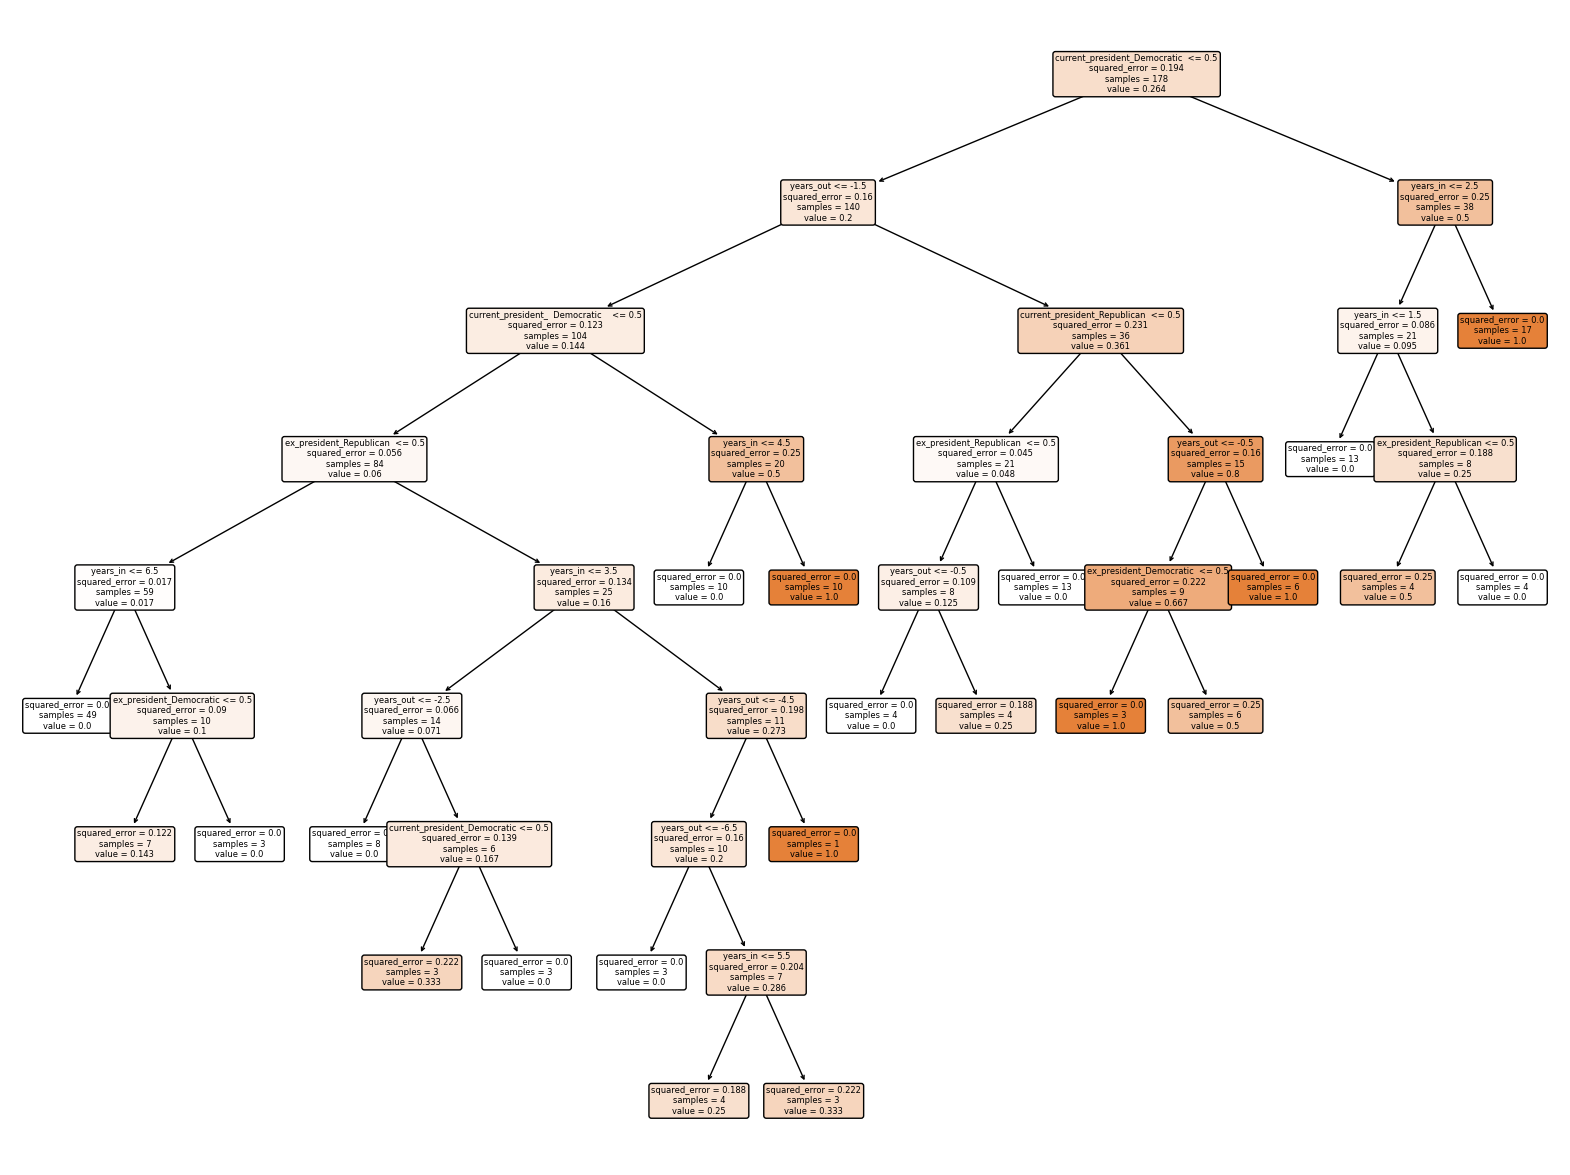

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error



# Assuming you have a DataFrame df with features and target variable 'target'
# Example DataFrame:
# df = pd.read_excel(r'C:\Users\zelli\Downloads\Book 1.xlsx')
analytics=analytics.dropna()
analytics['up/down']=analytics['y_normalized'].apply(lambda x: 1 if x > 0.499999 else 0)
analytics=analytics.drop('y_normalized', axis=1)

X = analytics.drop('up/down', axis=1)# Features
y = analytics['up/down']  # Target variable


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42)

# Fit the regressor on the training data
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Convert Index to list for feature_names
feature_names_list = list(X.columns)



# Plot the regression tree with max depth of 5
plt.figure(figsize=(20, 15))  # Adjust the figure size as needed
plot_tree(regressor, filled=True, feature_names=feature_names_list, rounded=True, fontsize=6)  # Adjust fontsize as needed
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error


# Assuming you have a DataFrame df with features and target variable 'target'
# Example DataFrame:
# df = pd.read_excel(r'C:\Users\zelli\Downloads\Book 1.xlsx')
analytics=analytics.dropna()
# Separate features and target variable
X = analytics.drop('up/down', axis=1)# Features
y = analytics['up/down']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


# Setting parameters for XGBoost
param = {
    'max_depth': 5,  # maximum depth of a tree
    'eta': 0.1,  # learning rate
    'objective': 'reg:squarederror'
}

# Training the model
num_round = 100  # number of boosting rounds
xgb_model = xgb.train(param, dtrain, num_round)

# Making predictions on the test set
y_pred = xgb_model.predict(dtest)


# Evaluate the regressor
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.1205842952137937


In [ ]:
df.to_csv('defecit_data.csv')